In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import myd2l

epoch 10 x: 0.060466


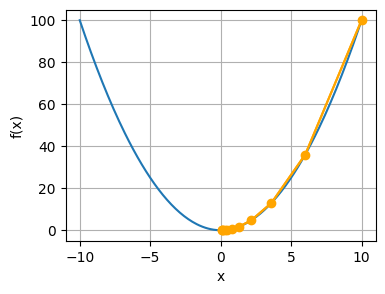

In [2]:
def f(x):
    return x ** 2

def f_grad(x):
    return 2 * x

def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10 x: {x:.6f}')
    
    return results

def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.1)
    
    ax = myd2l.build_ax('x', 'f(x)', figsize=(4, 3))
    ax.plot(f_line, f(f_line))
    ax.plot(results, [f(x) for x in results], c='orange')
    ax.plot(results, [f(x) for x in results], c='orange', marker='o')

results = gd(0.2, f_grad)
show_trace(results, f)

epoch 10 x: 3.486784


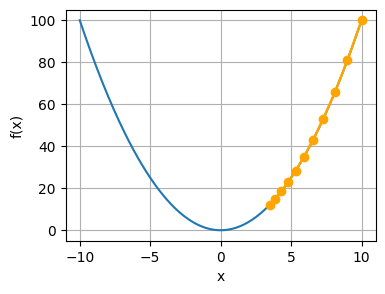

In [3]:
show_trace(gd(0.05, f_grad), f)

epoch 10 x: 61.917364


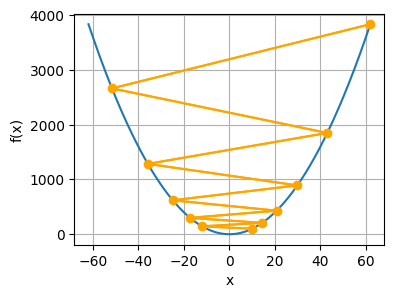

In [4]:
show_trace(gd(1.1, f_grad), f)

epoch 10 x: -1.528166


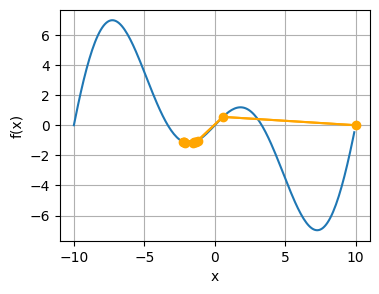

In [5]:
c = torch.tensor(0.15 * np.pi)

def f(x):
    return x * torch.cos(c * x)

def f_grad(x):
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

epoch 10 x: 7.330616


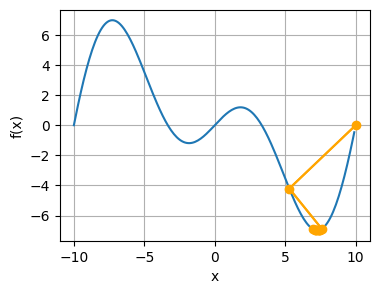

In [6]:
show_trace(gd(1, f_grad), f)

In [7]:

def train_2d(trainer, step=20, f_grad=None, eta=0.1):
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(step):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad, eta)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1 : {float(x1):f}, x2: {float(x2):f}')
    
    return results


def show_trace_2d(results, f):
    ax = myd2l.build_ax('x1', 'x2', grid=False, figsize=(5, 4))
    ax.plot(*zip(*results), '-o', c='orange')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1), torch.arange(-3.0, 1.0, 0.1), indexing='ij')
    ax.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    

In [21]:
def f_2d(x1, x2):
    return x1**2 + 2 * x2**2 + 0.1 * np.sin(5 * x1) + 0.1 * np.sin(5 * x2)

def f_2d_grad(x1, x2):
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad, eta):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

epoch 20, x1 : -0.000000, x2: -0.000000


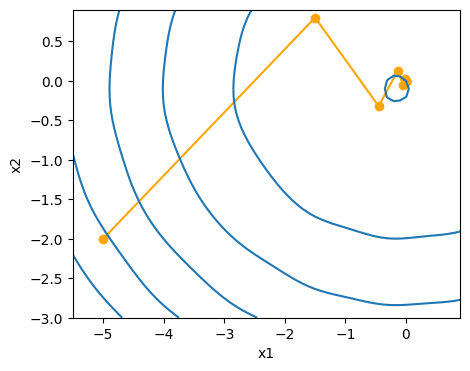

In [28]:
show_trace_2d(train_2d(gd_2d, f_grad=f_2d_grad, eta=0.35), f_2d)